# Image Processing using OpenCV
In this assignment we will learn how to process images using OpenCV. We more or less covered functions which will be useful in Computer Vision projects in general. Also added small questions for revision of OpenCV functions. Happy Learning :)

In [18]:
# Including all the imports
import cv2
import matplotlib.pyplot as plt
import numpy as np

Image transformations using OpenCV

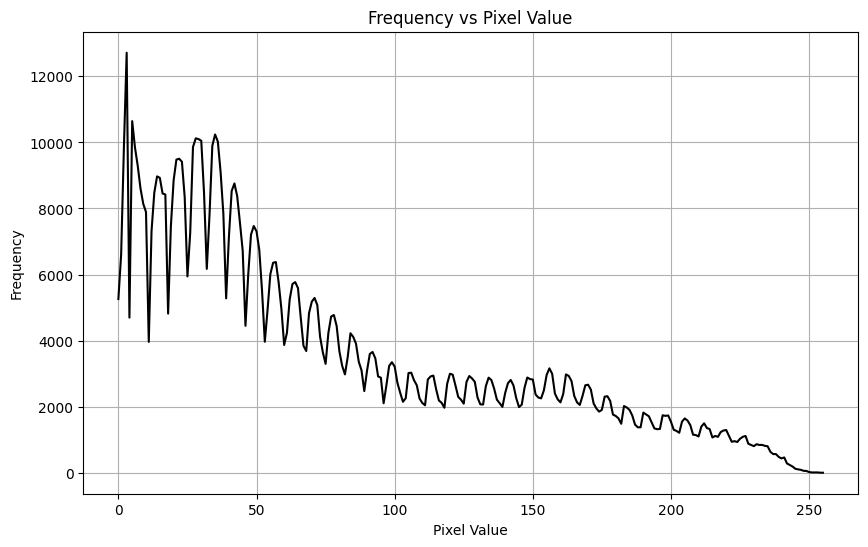

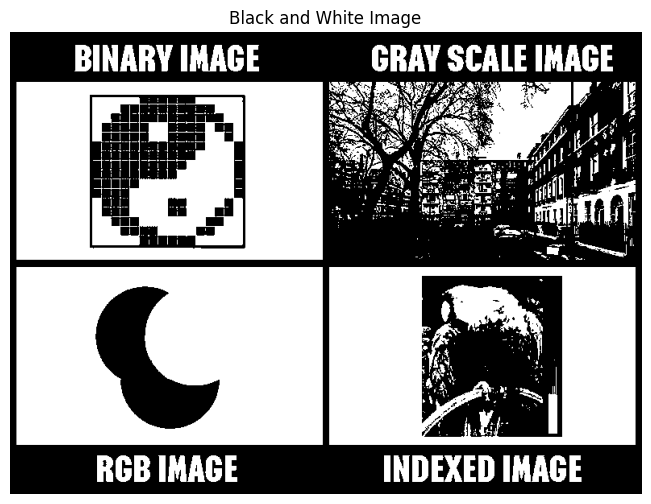

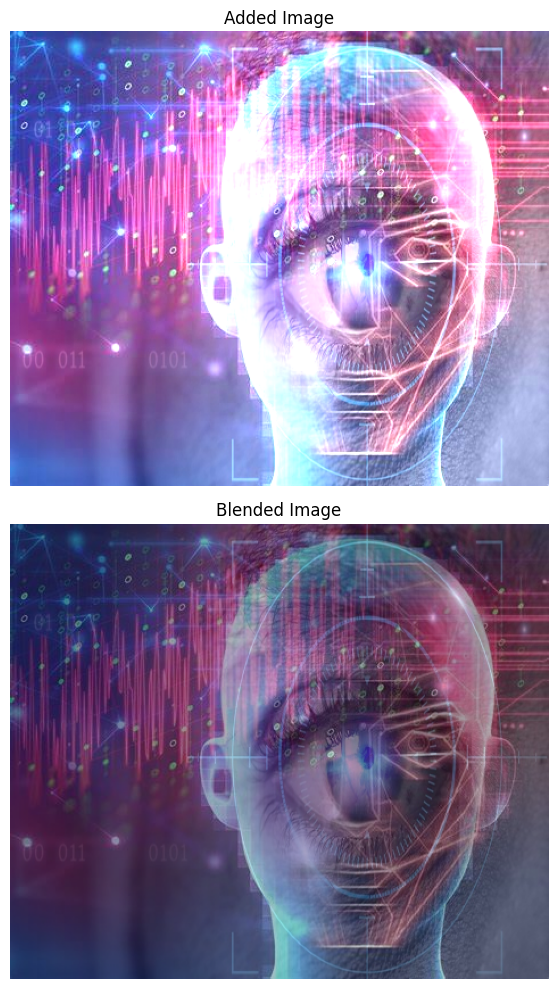

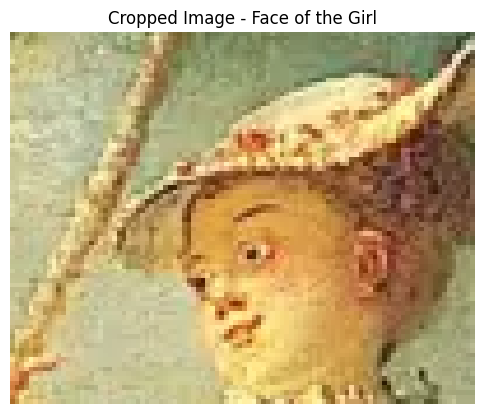

In [15]:
#----------------------------------------------------------------------------------------------------------------------------------
# 1. Plot the frequency vs pixel value graph (y vs x) and show the graph for 'the-swing.webp' image
image = cv2.imread('the-swing.webp')


# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError("The file 'the-swing.webp' was not found.")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.plot(histogram, color='black')
plt.title('Frequency vs Pixel Value')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#----------------------------------------------------------------------------------------------------------------------------------
# 2. Convert the 'mixed_image.jpg' image into black and white using OpenCV and show the image

# Load the image
image = cv2.imread('mixed_image.jpg')

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError("The file 'mixed_image.jpg' was not found.")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to convert the grayscale image to black and white
_, bw_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the black and white image
plt.figure(figsize=(10, 6))
plt.imshow(bw_image, cmap='gray')
plt.title('Black and White Image')
plt.axis('off')
plt.show()


#----------------------------------------------------------------------------------------------------------------------------------
# 3. Perform any two arithmetic operations on the images 'eye_image.jpg' and 'image2.jpeg' and show the result
# Performing such operations is also know as blending of images

# Load the images
eye_image = cv2.imread('eye_image.jpg')
image2 = cv2.imread('image2.jpeg')

# Check if the images are loaded correctly
if eye_image is None:
    raise FileNotFoundError("The file 'eye_image.jpg' was not found.")
if image2 is None:
    raise FileNotFoundError("The file 'image2.jpeg' was not found.")

# Resize the images to the same dimensions
eye_image = cv2.resize(eye_image, (image2.shape[1], image2.shape[0]))

# Perform arithmetic operations
added_image = cv2.add(eye_image, image2)
alpha = 0.5
blended_image = cv2.addWeighted(eye_image, alpha, image2, 1 - alpha, 0)

# Display the results
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.title('Added Image')
plt.imshow(cv2.cvtColor(added_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 1, 2)
plt.title('Blended Image')
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()



#----------------------------------------------------------------------------------------------------------------------------------
# 4. Crop the image 'the-swing.webp' and show the result of having only the face of the girl

# Load the image
image = cv2.imread('the-swing.webp')


# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError("The file 'the-swing.webp' was not found.")

# Define the coordinates of the region of interest (ROI) for the face
# These coordinates need to be determined manually or using a face detection algorithm
# For this example, let's assume the coordinates are (x, y, width, height)
x, y, width, height = 500, 220, 100, 80  # Example coordinates, adjust as needed

# Crop the image to the ROI
cropped_image = image[y:y+height, x:x+width]

# Display the cropped image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image - Face of the Girl')
plt.axis('off')
plt.show()


#----------------------------------------------------------------------------------------------------------------------------------

Detecting elements in images

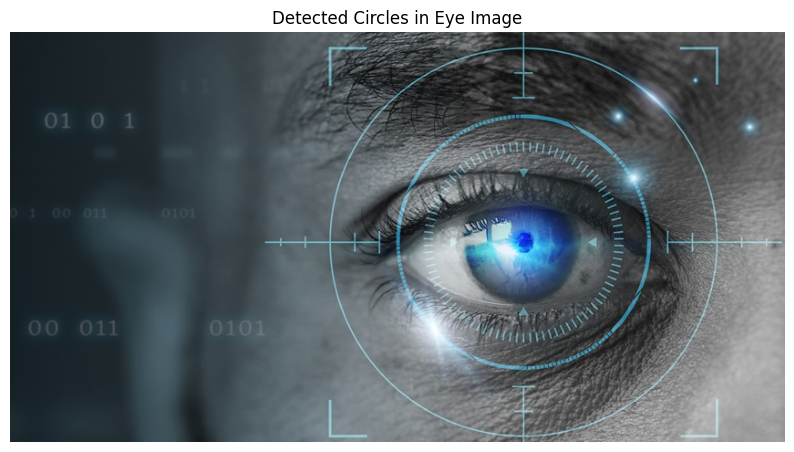

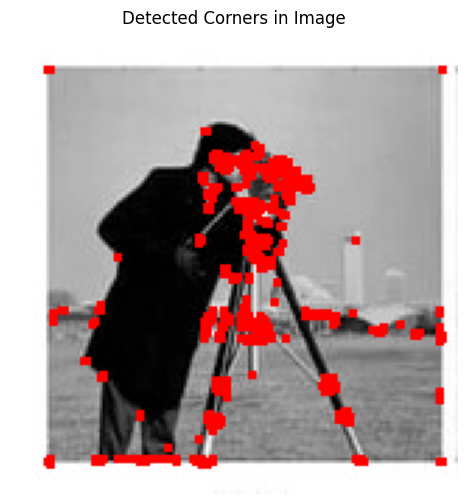

In [20]:
#----------------------------------------------------------------------------------------------------------------------------------
# 5. In the given 'eye_image.jpg' image detect circles which have radius between 1-10 pixels

# Load the image
image = cv2.imread('eye_image.jpg')

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError("The file 'eye_image.jpg' was not found.")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur to reduce noise and improve circle detection
gray_blurred = cv2.GaussianBlur(gray_image, (9, 9), 2)

# Use the Hough Circle Transform to detect circles
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=20,
    param1=50,
    param2=30,
    minRadius=1,
    maxRadius=10
)

# If some circles are detected, draw them on the original image
if circles is not None:
    circles = np.uint8(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])  # center of the circle
        radius = circle[2]  # radius of the circle
        # Draw the circle center
        cv2.circle(image, center, 1, (0, 100, 100), 3)
        # Draw the circle outline
        cv2.circle(image, center, radius, (255, 0, 255), 3)

# Convert the image from BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title('Detected Circles in Eye Image')
plt.axis('off')
plt.show()




#----------------------------------------------------------------------------------------------------------------------------------
# 6. In the image 'smoothing.jpg', detect corners in the image. You can try them from here 'https://stackoverflow.com/questions/7263621/how-to-find-corners-on-a-image-using-opencv' too.

image = cv2.imread('smoothing.jpg')
if image is None:
    raise FileNotFoundError("The file 'smoothing.jpg' was not found.")
#convert the image to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

#apply harris corner detection
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
image[dst > 0.01 * dst.max()] = [0, 0, 255]
#convert the image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#display the image
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title('Detected Corners in Image')
plt.axis('off')
plt.show()

#----------------------------------------------------------------------------------------------------------------------------------

Learning about kernels

In [ ]:
#----------------------------------------------------------------------------------------------------------------------------------
# 7. Build your own gaussian kernel and learn why kernels are important


def gaussian_kernel(size, sigma=1):
    """Generate a Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

# Define the size and sigma of the kernel
size = 5
sigma = 1.0

# Generate the Gaussian kernel
kernel = gaussian_kernel(size, sigma)

# Print the kernel
print("Gaussian Kernel:")
print(kernel)

# Visualize the kernel
plt.imshow(kernel, cmap='gray')
plt.title('Gaussian Kernel')
plt.colorbar()
plt.show()


#----------------------------------------------------------------------------------------------------------------------------------
# 8. Using the gaussian kernel built above, smooth the image 'smoothing.jpg'
# Load the image
image = cv2.imread('smoothing.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError("The file 'smoothing.jpg' was not found.")

# Apply the Gaussian kernel to the image using convolution
smoothed_image = cv2.filter2D(image, -1, kernel)

# Display the original and smoothed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Smoothed Image')
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')

plt.show()

